In [1]:
#import the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
logins=pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


### Part 1 ‐ Exploratory data analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.



In [4]:
counts=logins.resample('15min', on='login_time').count()
counts.columns=['counts']

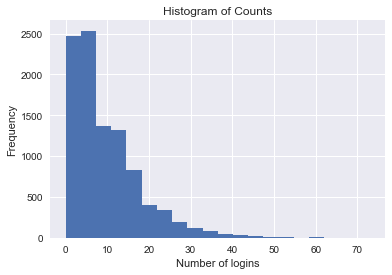

In [5]:
plt.hist(counts['counts'],bins=20)
plt.xlabel('Number of logins')
plt.ylabel('Frequency')
plt.title('Histogram of Counts')
plt.show()

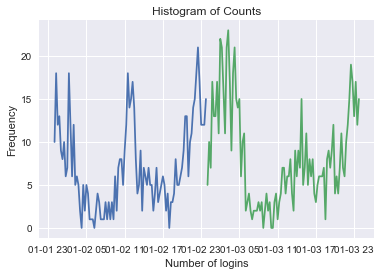

In [6]:
plt.plot(counts['January 2nd 1970'])
plt.plot(counts['January 3rd 1970'])
plt.xlabel('Number of logins')
plt.ylabel('Frequency')
plt.title('Histogram of Counts')
plt.show()

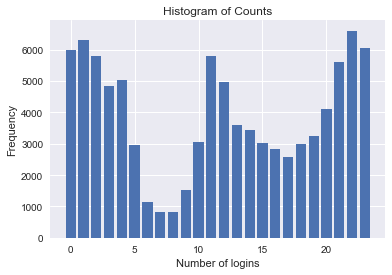

In [7]:
count_by_hour=counts.groupby(counts.index.hour).sum()
plt.bar(count_by_hour.index,count_by_hour['counts'])
plt.xlabel('Number of logins')
plt.ylabel('Frequency')
plt.title('Histogram of Counts')
plt.show()

### Overview

In the cells above I analyzed the logins data. I started off by grouping into 15 minute intervals and then created a histogram of counts. From that we can see that lower number of counts in a 15 minute interval are more likely and decrease evenly. The largest number of logins during a 15 minutes period of time was 60. I then took a look at a few days to see if i could recognize any patterns. I immediately noticed the spikes at related times. To confirm this and get a generalization, I took the sum of counts at each hour and represented that with the bar graph above. This graph confirms the intial observation and we see 2 distinct high times for logins. 1 in the middle of day around noon, and on that starts around 9pm and goes till 4 am.


### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

*1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?*

*2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

***What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?***

First, I am going to assume that Ultimate inc is some kind of uber/lfyt company (that piece of information would have been nice). So basically the goal of this experiment is to get more drivers crossing between the two cities because right now drivers normally stay in one of the two cities because of the towel. The metric that I would choose would be percentage of pickups in Gotham. I would have chosen ratio of gotham pickups to metropolis pickups but then I realized this would cause a problem if a driver took 0 pickups in one of the cities. So I would then compare the percentage of pickups in Gotham before the experiment to after.

I would choose this metric because it is easily comparable and makes the effictiveness of the initiative easily measureable. I would measure absolute value in change to determine how effective the experiment was.

***Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:***

Here is an outline of my experiment:

1) I would calculate the percentage of pickups in gotham for each user

2) I would then calculate the percentage of pickups in gotham for each day after the begining of the experiment for each user

3) I would then graph the unsigned change in percentage of pickups in gotham city over time for each user and overall

4) I would use a t-test to verify that these observations did not happen by chance.

5) If we see an increase in the change of pickups and it is deemed statistically signficant then we can say that the experiment worked. The exact increase that would make the cost worth the effect would be up to the team. One caveat that I would add is that is likely that drivers will still have a city that they perfer (their home city) because of proximity to their home.



### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [14]:
import json
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

df=pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [16]:
df.index=df.index.rename('user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
user_id,,,,,,,,,,,,
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [18]:
df_dropped=df.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
total=len(df.index)
df_retained=df[df.trips_in_first_30_days>0]
retained=len(df_retained.index)
retained_percentage=retained/total

print(retained_percentage)

0.6922


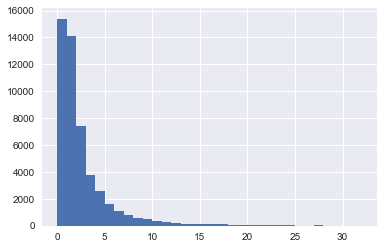

In [20]:
plt.hist(df.trips_in_first_30_days,bins=32,range=(0,32))
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

To determine the retention rate, retention being defined as being after in the 30 days after signup, I calucluated the size of the dataframe where the trips_in_first_30_days column have a value greater than 0. I divide that size by the total number of rows and get the retention rate. I also created a histogram of number of trips in the first 30 days to understand the trend, that graph is direclty above.

Now I format the dataframe to allow for prediction. I will create a column called retained, which will either be 1 or 0, this will be the y values. Then the X values with be the rest of the datafram minus the new retained column, the tripsin... column, and the date columns.

This prediction is a classification problem, ie either retained or not retained, and the end result wants that we find which factors best determine if a user is retained or not, so I will use logistic regression because it is used for classification problems and has a simply attribute for determine feature importance. Alternatives include k-nearest neighbors and naive bayes. Below is my evaluation and analysis

In [21]:
df_dropped['retained']=df_dropped['trips_in_first_30_days']>0
df_dropped.head()

/Users/joshualee/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
user_id,,,,,,,,,,,,,
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,True
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,True


In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split

y=df_dropped['retained'].values
df_x=df_dropped.drop(['trips_in_first_30_days','retained','last_trip_date','signup_date'],axis=1)
df_x=pd.get_dummies(df_x,drop_first=False)
X=df_x.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [24]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
param_grid = {'C':[0.01,0.1,1,10,100]}
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

logreg_cv.fit(X_train,y_train)
predicted=logreg_cv.predict(X_test)
score=logreg_cv.score(X_test,y_test)

print(score)

0.7233392311404214


In [25]:
accuracy=accuracy_score(y_test, predicted)
precision=precision_score(y_test, predicted)
recall=recall_score(y_test, predicted)

NameError: name 'accuracy_score' is not defined

In [ ]:
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

In [ ]:
logreg.fit(X_train,y_train)
coef=logreg.coef_
columns=df_x.columns

df_coef=pd.DataFrame(data=coef[0],index=columns)
df_ranked=df_coef.sort_values(0)
df_ranked

Above we see the accuracy, precision, and recall of the model. The Recall is very good and the accuracy and precision are almost identical and perform good as well. Also above we see the feature importance, with first dummy not dropped to see all possible values. The most important feature is living in Winterfell.

From the above analysis we can make some insights to be used by Ultimate inc. to improve their driver retention

1) figure out what about winterfell as a city is causing a higher retention rate, possibly layout, # of cars, and determine if this underlying cause is replicable in the other cities

2) using ultimate black increases that likely hood of retention, so offering up reduced or free black rides in the critical retention period would be good

3) Iphones have slightly better retention rate than android, so upgrading the android application is a must